<a href="https://colab.research.google.com/github/Rafe2001/The-Sparks-Foundation-Internship-Tasks/blob/main/TSF_Task_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **The Sparks Foundation : Data Science and Business Analytics Internship**

#**Task 6** : Prediction using Decision Tree Algorithm

**Level**: Intermediate

**Objective** :

1.Create the Decision Tree classifier and visualize it graphically.

2.The purpose is if we feed any new data to this classifier, it would be able to
predict the right class accordingly.


**Author** : Rafe Khan


**IDE** : Google Colab

#Data Preprocessing

In [1]:
import sklearn.datasets as datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier

iris = datasets.load_iris()
df=pd.DataFrame(iris.data, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [2]:
df['species'] = iris.target
print(df['species'])

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: species, Length: 150, dtype: int64


In [3]:
df.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


In [4]:
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64

In [5]:
df.duplicated().sum()

1

In [6]:
df['species'].value_counts()

0    50
1    50
2    50
Name: species, dtype: int64

In [7]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


#Data Visualization

In [9]:
df['species'] = df['species'].replace([0,1,2],['iris-setosa','iris-versicolor','iris-virginica'])

<Axes: xlabel='sepal length (cm)', ylabel='petal length (cm)'>

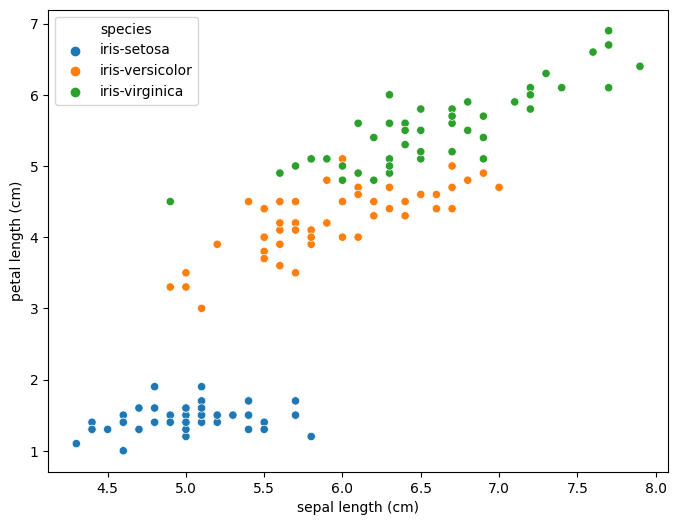

In [10]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='sepal length (cm)',y='petal length (cm)',data=df,hue='species')

<Axes: xlabel='sepal width (cm)', ylabel='petal width (cm)'>

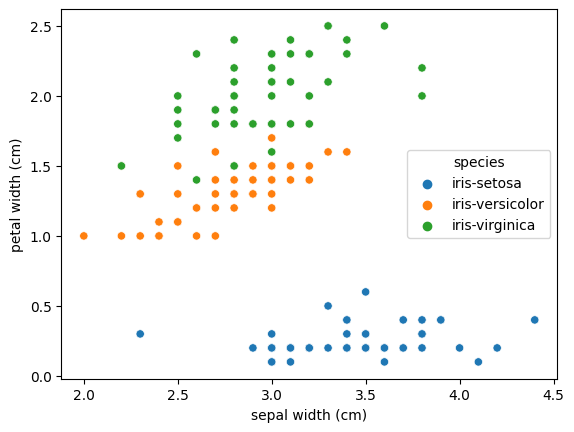

In [11]:
sns.scatterplot(x='sepal width (cm)',y='petal width (cm)',data=df,hue='species')

<Axes: xlabel='species', ylabel='petal length (cm)'>

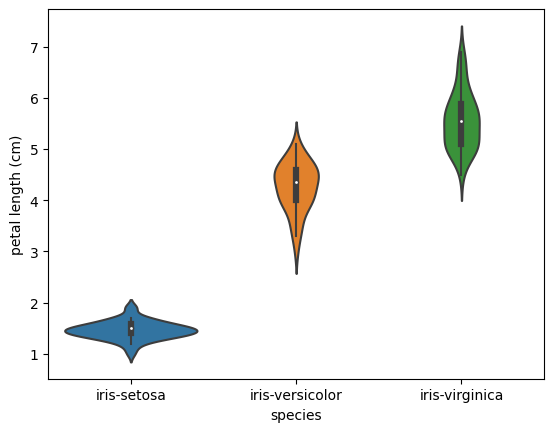

In [12]:
sns.violinplot(x='species',y='petal length (cm)',data=df)

In [13]:
df['species'] = df['species'].replace(['iris-setosa','iris-versicolor','iris-virginica'],[0,1,2])

<Axes: >

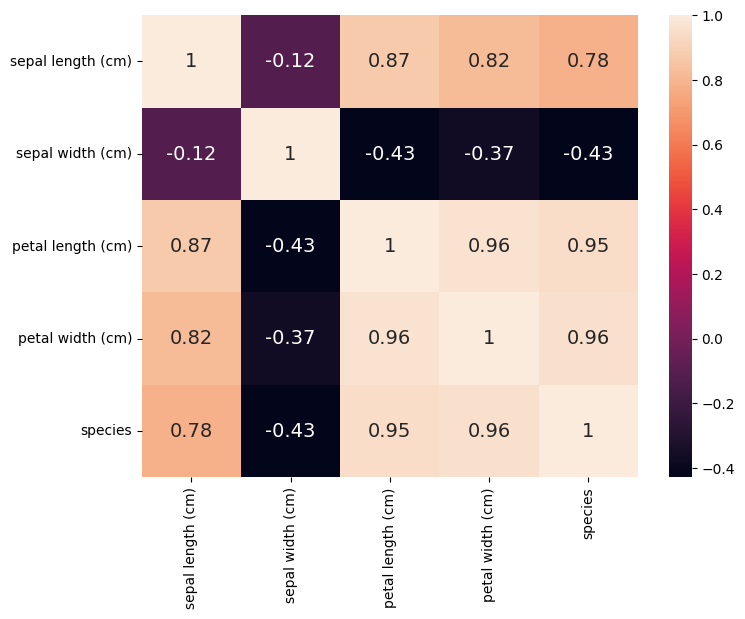

In [14]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(),annot=True,annot_kws={'size':14})

In [15]:
x=df.drop('species',axis=1)
y=df['species']

In [16]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.2,random_state=42)

#Training and Testing the Model

In [17]:
model = DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0)

In [18]:
model.fit(x_train,y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


DecisionTreeClassifier(max_depth=3, max_features='auto')

In [19]:
y_pred = model.predict(x_test)
y_pred_train = model.predict(x_train)

In [20]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
acc = accuracy_score(y_pred,y_test)
ac = accuracy_score(y_pred_train,y_train)
print("Accuracy of the model is: ",acc*100)
print(ac*100)

Accuracy of the model is:  96.66666666666667
100.0


In [21]:
!pip install pydotplus
!apt-get install graphviz -y

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Reading package lists... Done
Building dependency tree       
Reading state information... Done
graphviz is already the newest version (2.42.2-3build2).
0 upgraded, 0 newly installed, 0 to remove and 24 not upgraded.


In [22]:
import six
import sys
sys.modules['srt mlroseklearn.externals.six'] = six

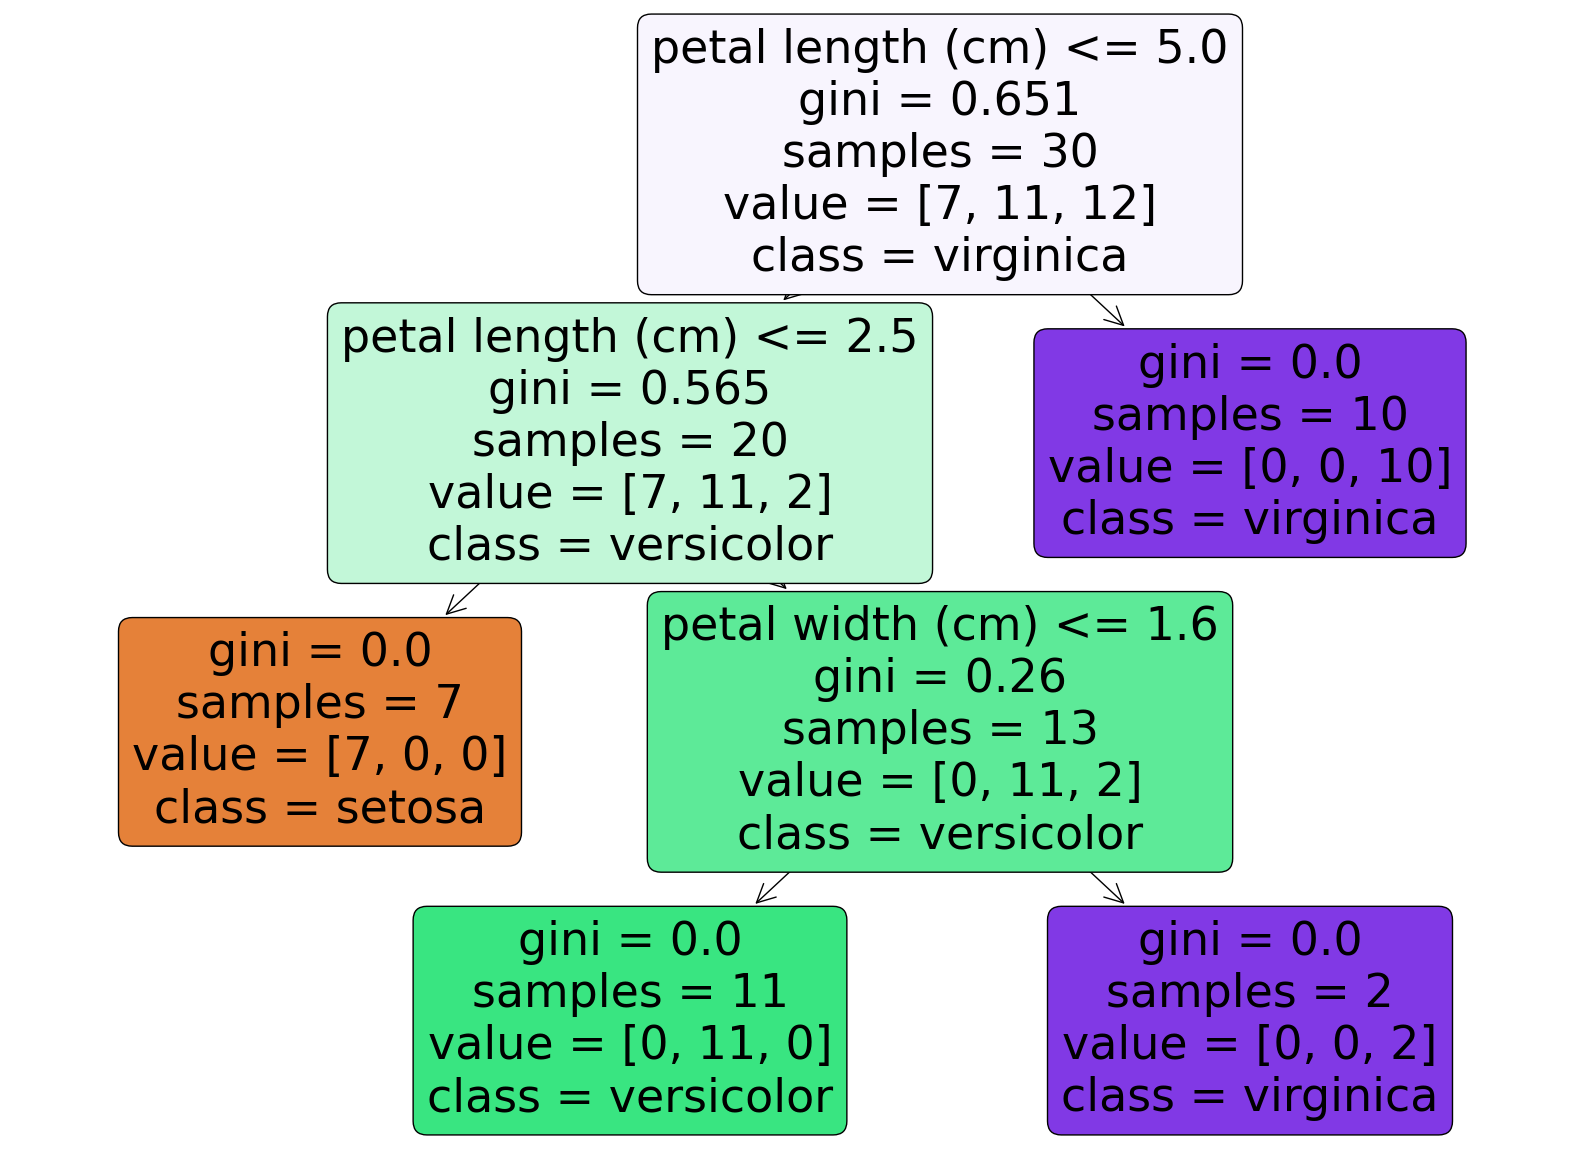

In [23]:
from sklearn import tree
fig = plt.figure(figsize=(20,15))
_ = tree.plot_tree(model, 
                   feature_names=iris.feature_names,  
                   class_names=iris.target_names,
                   filled=True, rounded=True)

#Thank You